In [1]:
import os
import random
import scipy
import shutil
from pathlib import Path
from PIL import Image, ImageDraw

# Step 1 Define PATH & change folder names


In [2]:
"""
dict structure:
├── annotations (Origin annotations)
├── annotations_COCO
├── Cityperson/leftImg8bit (Origin file)
└── cp (Model running file)
    ├── images
    │   ├── test (500)
    │   ├── train (2380)
    │   └── val (595)
    └── labels
        ├── test (500)
        ├── train (2380)
        └── val (595)
"""
# Root directory
ROOT = "./datasets"
# Annotation saving path
ANNO_DIR = os.path.join(ROOT, "annotations")
# COCO format annotation saving path
COCO_ANNO_DIR = os.path.join(ROOT, "annotations_COCO")

# Origin file path
ORIGIN_DIR = os.path.join(ROOT, "Cityperson/leftImg8bit")
SOURCE_TRAIN_DIR = os.path.join(ORIGIN_DIR, "train")
SOURCE_VAL_DIR = os.path.join(ORIGIN_DIR, "val")
# SOURCE_TEST_DIR = os.path.join(ORIGIN_DIR, "test")  # never used

# Target path of 'test' and 'val' split from 'train'
TARGET_DIR = os.path.join(ROOT, "cp")
TARGET_TRAIN_DIR = os.path.join(TARGET_DIR, "images/train")
TARGET_VAL_DIR = os.path.join(TARGET_DIR, "images/val")
TARGET_TEST_DIR = os.path.join(TARGET_DIR, "images/test")

TARGET_TRAIN_LABEL = os.path.join(TARGET_DIR, "labels/train")
TARGET_VAL_LABEL = os.path.join(TARGET_DIR, "labels/val")
TARGET_TEST_LABEL = os.path.join(TARGET_DIR, "labels/test")

# Proportion of 'val' split from 'train'
VAL_SET_PAR = 0.2

# Debug data set
DEBUG_SIZE_TRAIN = 40
DEBUG_SIZE_VAL = 20


anno_train_file_mat = "anno_train.mat"
anno_val_file_mat = "anno_val.mat"

# Define label names
city_person_label_list = [
    {"id": 0, "name": "ignore regions"},
    {"id": 1, "name": "pedestrians"},
    {"id": 2, "name": "riders"},
    {"id": 3, "name": "sitting persons"},
    {"id": 4, "name": "unusual postures"},
    {"id": 5, "name": "group of people"},
]

In [3]:
# Create new folders
Path(TARGET_TRAIN_DIR).mkdir(parents=True, exist_ok=True)
Path(TARGET_VAL_DIR).mkdir(parents=True, exist_ok=True)
Path(TARGET_TEST_DIR).mkdir(parents=True, exist_ok=True)
Path(TARGET_TRAIN_LABEL).mkdir(parents=True, exist_ok=True)
Path(TARGET_VAL_LABEL).mkdir(parents=True, exist_ok=True)
Path(TARGET_TEST_LABEL).mkdir(parents=True, exist_ok=True)

# Step 2 Load annotations (train_source & val_source)


In [4]:
anno_train_mat = scipy.io.loadmat(os.path.join(ANNO_DIR, anno_train_file_mat))
anno_val_mat = scipy.io.loadmat(os.path.join(ANNO_DIR, anno_val_file_mat))
anno_train_mat.keys()
anno_val_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'anno_val_aligned'])

In [5]:
# Check some unnecessary elements
print(anno_train_mat["__header__"])
print(anno_train_mat["__version__"])
print(anno_train_mat["__globals__"])

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue May 23 10:53:38 2017'
1.0
[]


In [6]:
# Flatten
anno_train_mat = anno_train_mat["anno_train_aligned"].flatten()
anno_val_mat = anno_val_mat["anno_val_aligned"].flatten()
print(
    f"train source set size = {anno_train_mat.shape}, test source set size = {anno_val_mat.shape}."
)
anno_train_mat[1]

train source set size = (2975,), test source set size = (500,).


array([[(array(['aachen'], dtype='<U6'), array(['aachen_000001_000019_leftImg8bit.png'], dtype='<U36'), array([[  0, 877, 383,  14,  26,   0, 877, 383,  14,  26],
               [  0, 878, 423,  15,  25,   0, 878, 423,  15,  25],
               [  0, 464, 439,  11,  10,   0, 464, 439,  11,  10],
               [  0,  65, 425,  32,  25,   0,  65, 425,  32,  25]], dtype=uint16))                                                                                ]],
      dtype=[('cityname', 'O'), ('im_name', 'O'), ('bbs', 'O')])

In [7]:
# Convert 'mat' format into 'list'
def unzip_annotation(data):
    datasets = []

    for cell in data:
        city_name, im_name, bbs = cell[0][0]
        bbs_new = []
        for each in bbs:
            class_label, x1, y1, w, h, instance_id, x1_vis, y1_vis, w_vis, h_vis = each
            if class_label:
                print(class_label)
                bbs_new.append(
                    {
                        "class_label": 0,
                        "x1": x1,
                        "y1": y1,
                        "w": w,
                        "h": h,
                        "instance_id": instance_id,
                        "x1_vis": x1_vis,
                        "y1_vis": y1_vis,
                        "w_vis": w_vis,
                        "h_vis": h_vis,
                    }
                )
        # mistake in origin dataset
        if city_name[0] == "tuebingen":
            city_name[0] = "tubingen"
        datasets.append(
            {"city_name": city_name[0], "im_name": im_name[0], "bbs": bbs_new}
        )

    return datasets

In [8]:
train_source = unzip_annotation(anno_train_mat)
val_source = unzip_annotation(anno_val_mat)

3
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
5
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
2
5
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
2
2
5
5
5
3
3
3
3
3
1
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
5
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
3
3
3
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
3
3
3
1
1
1
1
1
1
1
3
3
3
2
2
5
5
1
1
3
3
1
1
5
5
1
1
1
1
1
1
1
1
2
2
2
1
2
2
1
1
1
2
4
1
1
1
4
1
1
1
1
1
1
1
1
3
1
1
1
1
1
5
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
3
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
3
3
1
1
3
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1


In [9]:
print(len(train_source), len(val_source), type(train_source), type(val_source))
print(train_source[0])

2975 500 <class 'list'> <class 'list'>
{'city_name': 'aachen', 'im_name': 'aachen_000000_000019_leftImg8bit.png', 'bbs': [{'class_label': 0, 'x1': 892, 'y1': 445, 'w': 21, 'h': 53, 'instance_id': 24000, 'x1_vis': 892, 'y1_vis': 445, 'w_vis': 21, 'h_vis': 53}, {'class_label': 0, 'x1': 901, 'y1': 443, 'w': 34, 'h': 55, 'instance_id': 24001, 'x1_vis': 901, 'y1_vis': 443, 'w_vis': 34, 'h_vis': 55}, {'class_label': 0, 'x1': 1844, 'y1': 436, 'w': 44, 'h': 106, 'instance_id': 25000, 'x1_vis': 1844, 'y1_vis': 441, 'w_vis': 44, 'h_vis': 101}]}


1683
0 1067 363 6 14
0 1069 376 7 16
0 1123 419 15 35
0 1169 425 20 48
0 1123 451 23 55
0 1356 395 96 235
0 1006 392 13 31
0 938 446 31 40
0 821 428 54 132
0 418 392 100 243
0 327 404 89 218
0 1006 420 16 39
0 1021 418 16 41
0 1037 421 15 38
0 714 387 90 220
0 1095 414 13 33


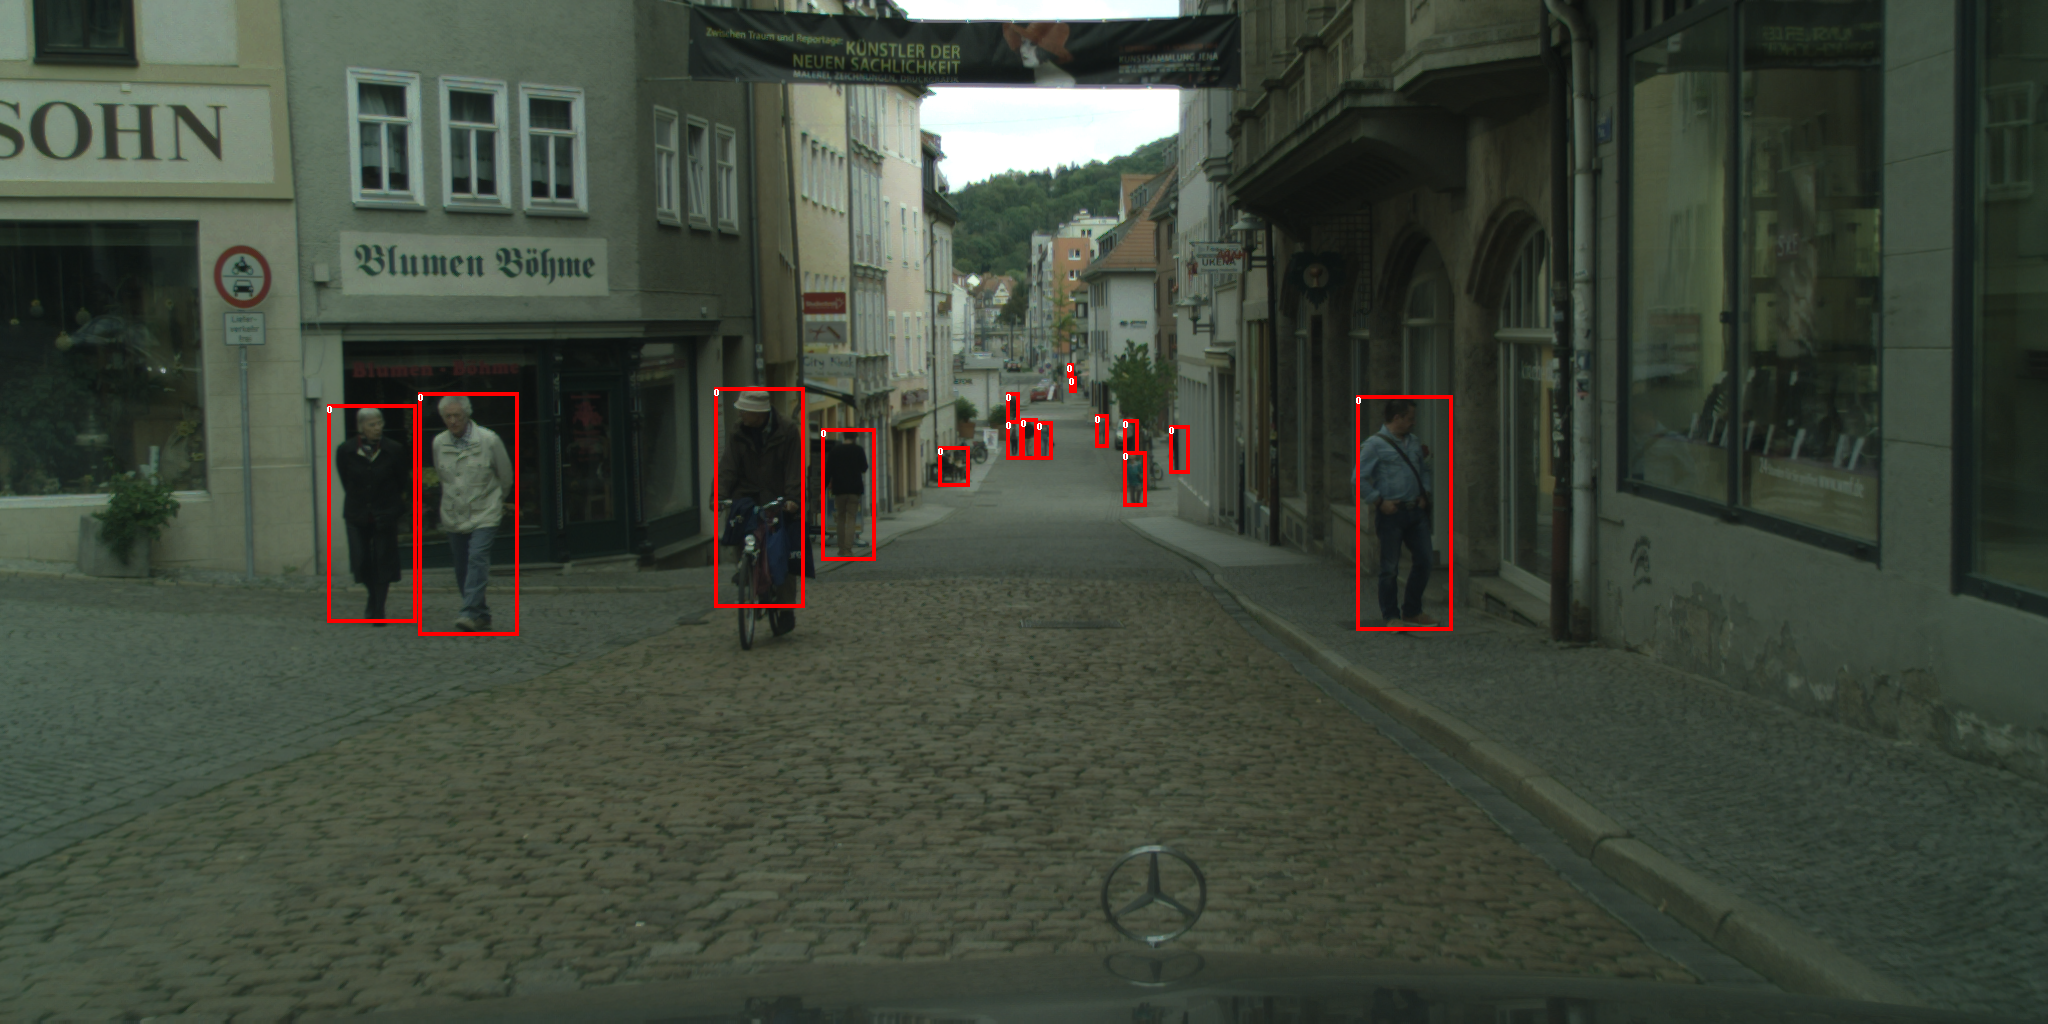

In [12]:
rand_index = random.randint(0, len(train_source))
print(rand_index)

city_name = train_source[rand_index]["city_name"]
im_name = train_source[rand_index]["im_name"]
im_path = os.path.join(SOURCE_TRAIN_DIR, city_name, im_name)

image = Image.open(im_path)

draw = ImageDraw.Draw(image, "RGBA")

for box in train_source[rand_index]["bbs"]:
    class_idx = box["class_label"]
    x, y, w, h = box["x1"], box["y1"], box["w"], box["h"]
    print(class_idx, x, y, w, h)
    draw.rectangle((x, y, x + w, y + h), outline="red", width=4)
    text = str(class_idx)
    draw.text(xy=(x, y), text=text, fill="white")

image

# Randomly split train_source into 'train' and 'val'


In [13]:
# Split proportionally
# random.seed(int(42))
# random.shuffle(train_source)

# split_index = int(VAL_SET_PAR * len(train_source))
# val_split = train_source[:split_index]
# train_split = train_source[split_index:]
# test_split = val_source

# print(len(train_split), len(val_split), len(test_split))

train_split = train_source
val_split = val_source

In [14]:
for item in train_split:
    source_path = os.path.join(SOURCE_TRAIN_DIR, item["city_name"], item["im_name"])
    target_path = os.path.join(TARGET_TRAIN_DIR, item["im_name"])
    if os.path.isfile(source_path):
        shutil.copy(source_path, target_path)
    else:
        print("ERROR:", source_path, target_path)

for item in val_split:
    source_path = os.path.join(SOURCE_VAL_DIR, item["city_name"], item["im_name"])
    target_path = os.path.join(TARGET_VAL_DIR, item["im_name"])
    if os.path.isfile(source_path):
        shutil.copy(source_path, target_path)
    else:
        print("ERROR:", source_path, target_path)

for item in test_split:
    source_path = os.path.join(SOURCE_VAL_DIR, item["city_name"], item["im_name"])
    target_path = os.path.join(TARGET_TEST_DIR, item["im_name"])
    if os.path.isfile(source_path):
        shutil.copy(source_path, target_path)
    else:
        print("ERROR:", source_path, target_path)

In [15]:
# Check for every image
train_count = 0
val_count = 0
test_count = 0
for item in train_split:
    target_path = os.path.join(TARGET_TRAIN_DIR, item["im_name"])
    if not os.path.isfile(target_path):
        print("ERROR:", target_path)
    train_count += 1
for item in val_split:
    target_path = os.path.join(TARGET_VAL_DIR, item["im_name"])
    if not os.path.isfile(target_path):
        print("ERROR:", target_path)
    val_count += 1
# for item in test_split:
#     target_path = os.path.join(TARGET_TEST_DIR, item["im_name"])
#     if not os.path.isfile(target_path):
#         print("ERROR:", target_path)
#     test_count += 1

print(train_count, val_count, test_count)

2975 500 0


# Convert labels into txt files


In [16]:
def convert2txt(data, img_dir, label_dir):
    for item in data:
        image_path = os.path.join(img_dir, item["im_name"])
        if not os.path.isfile(target_path):
            print("ERROR:", target_path)

        img = Image.open(image_path)
        img_width, img_height = img.size

        label_lines = []
        for bbs in item["bbs"]:
            upperleft_x, upperleft_y, width, height = (
                bbs["x1"],
                bbs["y1"],
                bbs["w"],
                bbs["h"],
            )
            center_x = upperleft_x + width / 2
            center_y = upperleft_y + height / 2

            center_x = str(round(center_x / img_width, 6))
            center_y = str(round(center_y / img_height, 6))
            width = str(round(width / img_width, 6))
            height = str(round(height / img_height, 6))

            label_lines.append(
                " ".join([str(bbs["class_label"]), center_x, center_y, width, height])
            )

        label_dst = os.path.join(label_dir, item["im_name"].split(".")[0] + ".txt")
        with open(label_dst, "w") as file:
            file.write("\n".join(label_lines))

In [17]:
convert2txt(train_split, TARGET_TRAIN_DIR, TARGET_TRAIN_LABEL)
convert2txt(val_split, TARGET_VAL_DIR, TARGET_VAL_LABEL)
# convert2txt(test_split, TARGET_TEST_DIR, TARGET_TEST_LABEL)

# Output


In [45]:
import json


anno_files_path = "datasets/annotations/val_gt.json"
PREDICT_DIR = os.path.join(TARGET_DIR, "predict")
Path(PREDICT_DIR).mkdir(parents=True, exist_ok=True)
output_path = "YOLOv8/runs/detect/predict9/labels"

with open(anno_files_path) as f:
    anno_test = json.load(f)
anno_test["images"]

[{'id': 1,
  'im_name': 'frankfurt_000000_000294_leftImg8bit.png',
  'height': 1024,
  'width': 2048},
 {'id': 2,
  'im_name': 'frankfurt_000000_000576_leftImg8bit.png',
  'height': 1024,
  'width': 2048},
 {'id': 3,
  'im_name': 'frankfurt_000000_001016_leftImg8bit.png',
  'height': 1024,
  'width': 2048},
 {'id': 4,
  'im_name': 'frankfurt_000000_001236_leftImg8bit.png',
  'height': 1024,
  'width': 2048},
 {'id': 5,
  'im_name': 'frankfurt_000000_001751_leftImg8bit.png',
  'height': 1024,
  'width': 2048},
 {'id': 6,
  'im_name': 'frankfurt_000000_002196_leftImg8bit.png',
  'height': 1024,
  'width': 2048},
 {'id': 7,
  'im_name': 'frankfurt_000000_002963_leftImg8bit.png',
  'height': 1024,
  'width': 2048},
 {'id': 8,
  'im_name': 'frankfurt_000000_003025_leftImg8bit.png',
  'height': 1024,
  'width': 2048},
 {'id': 9,
  'im_name': 'frankfurt_000000_003357_leftImg8bit.png',
  'height': 1024,
  'width': 2048},
 {'id': 10,
  'im_name': 'frankfurt_000000_003920_leftImg8bit.png',
  'he

In [46]:
mr_list = []
for file_name in os.listdir(output_path):
    print(file_name)
    for each in anno_test["images"]:
        if each["im_name"].split(".")[0] == file_name.split(".")[0]:
            id = each["id"]
            im_name = each["im_name"]
            height = each["height"]
            width = each["width"]
            print(id)
            break

    with open(os.path.join(output_path, file_name)) as file:
        lines = [line.rstrip() for line in file]
        print(lines)
    for annotation in lines:
        (
            category,
            center_x_r,
            center_y_r,
            width_rate,
            height_rate,
            score,
        ) = annotation.split(" ")
        mr_list.append(
            {
                "image_id": id,
                "im_name": im_name,
                "category_id": 1,
                "bbox": [
                    round(float(center_x_r) * width)
                    - round(float(width_rate) * width / 2),
                    round(float(center_y_r) * height)
                    - round(float(height_rate) * height / 2),
                    round(float(width_rate) * width),
                    round(float(height_rate) * height),
                ],
                "score": float(score),
            }
        )
mr_list[0]

frankfurt_000000_000294_leftImg8bit.txt
1
['0 0.605964 0.413483 0.0192683 0.092312 0.872865', '0 0.574981 0.414165 0.0186165 0.0913264 0.836477', '0 0.591327 0.411575 0.0170199 0.0837545 0.832299', '0 0.466536 0.412871 0.00787708 0.039199 0.608621']
frankfurt_000000_000576_leftImg8bit.txt
2
['0 0.593989 0.408109 0.0243202 0.118617 0.907757']
frankfurt_000000_001016_leftImg8bit.txt
3
['0 0.734011 0.426483 0.0554636 0.268723 0.945833', '0 0.373204 0.4389 0.0492889 0.240969 0.919729', '0 0.46458 0.429419 0.0296278 0.145706 0.906671']
frankfurt_000000_001236_leftImg8bit.txt
4
['0 0.338734 0.418552 0.0217603 0.106718 0.893046', '0 0.630311 0.405417 0.0170619 0.0834777 0.861265', '0 0.492005 0.396038 0.0168498 0.0828372 0.851186', '0 0.278339 0.406805 0.0129047 0.0641056 0.830524', '0 0.259705 0.40351 0.0141937 0.0702714 0.774088', '0 0.401149 0.405989 0.0139574 0.0695663 0.713565', '0 0.519662 0.397121 0.00888479 0.0436735 0.461109', '0 0.592544 0.400041 0.0136227 0.0637325 0.320787', '0 0.

{'image_id': 1,
 'im_name': 'frankfurt_000000_000294_leftImg8bit.png',
 'category_id': 1,
 'bbox': [1221, 376, 39, 95],
 'score': 0.872865}

In [47]:
len(mr_list)

3625

In [48]:
jsonlist = json.dumps({"annotations": mr_list})
with open("predict.json", "w") as f:
    f.write(jsonlist)

In [49]:
with open("custom_prediction_300.json") as f:
    anno_300 = json.load(f)
len(anno_300)

150000

In [ ]:
rand_index = random.randint(0, len(val_source))
print(rand_index)

city_name = val_source[rand_index]["city_name"]
im_name = val_source[rand_index]["im_name"]
im_path = os.path.join(SOURCE_TRAIN_DIR, city_name, im_name)

image = Image.open(im_path)

draw = ImageDraw.Draw(image, "RGBA")

for box in val_source[rand_index]["bbs"]:
    class_idx = box["class_label"]
    x, y, w, h = box["x1"], box["y1"], box["w"], box["h"]
    print(class_idx, x, y, w, h)
    draw.rectangle((x, y, x + w, y + h), outline="red", width=4)
    text = str(class_idx)
    draw.text(xy=(x, y), text=text, fill="white")

with open(output_path + im_name) as f:
    pass

image